In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

### 1. Reading Data : 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deep_Learning/NLP/Duplicate_question/train.csv")

In [ ]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
396958,396958,530062,530063,Do programmers enjoy their job?,Are you enjoying your job?,0
296967,296967,399893,419274,What exactly is Rothschild Conspiracy?,What is the Rothschild conspiracy? Is it actua...,1
94002,94002,157055,157056,"Can I become an FBI special agent, if I have A...",How did you become an FBI special agent?,0
359754,359754,210894,161771,What was the sweetest thing you have ever hear...,What is the cutest thing someone has ever said...,1
74778,74778,128086,128087,What is dry ice blasting used for?,How is dry ice formed?,0


In [ ]:
df.shape

(404290, 6)

We have the following columns

- id: A unique id for the question pair
- qid1: id of the first question.
- qid2: id of the second question
- question1: the first question
- question2: second question
- is_duplicate: Whether both are duplicate or not.

### 2. Exploring Data : 

In [ ]:
## checking null values 
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

Null Values are lesser than 5% so we can drop them directly 

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(404287, 6)

In [ ]:
## Checking duplicate Values 
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


#### Analyzing Distribution of Targets 

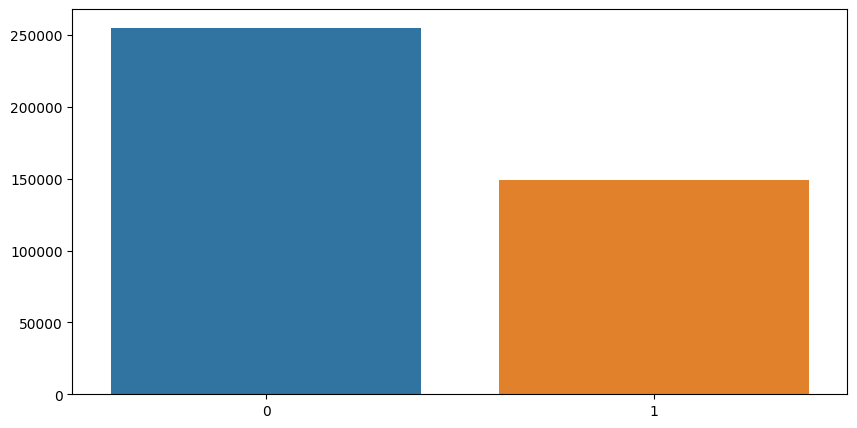

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=[0,1] , y=df['is_duplicate'].value_counts().values)
plt.show()

#### Number of Unique  and repeated Questions 

Total number of unique questions is 537929
Number of questions that repeated more than 1 time is 111778 which is 20.779322178205675%
The maximum number of times a question occured is 157


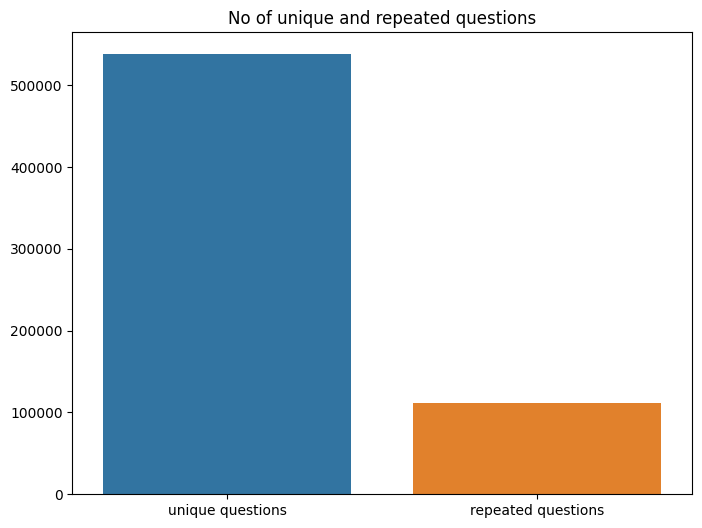

In [ ]:
qids = pd.Series(df.qid2.tolist() + df.qid1.tolist())
uniq = len(np.unique(qids))
print('Total number of unique questions is {}'.format(uniq))
#Number of questions that repeated than 1 time
cnt = qids.value_counts()
more1 = len(cnt[cnt.values > 1])
print('Number of questions that repeated more than 1 time is {} which is {}%'.format(more1,(more1/(len(cnt))*100)))
print('The maximum number of times a question occured is {}'.format(max(cnt)))

plt.figure(figsize=(8,6))
x = ['unique questions','repeated questions']
y = [uniq,more1]
sns.barplot(x=x,y=y)
plt.title('No of unique and repeated questions')
plt.show()



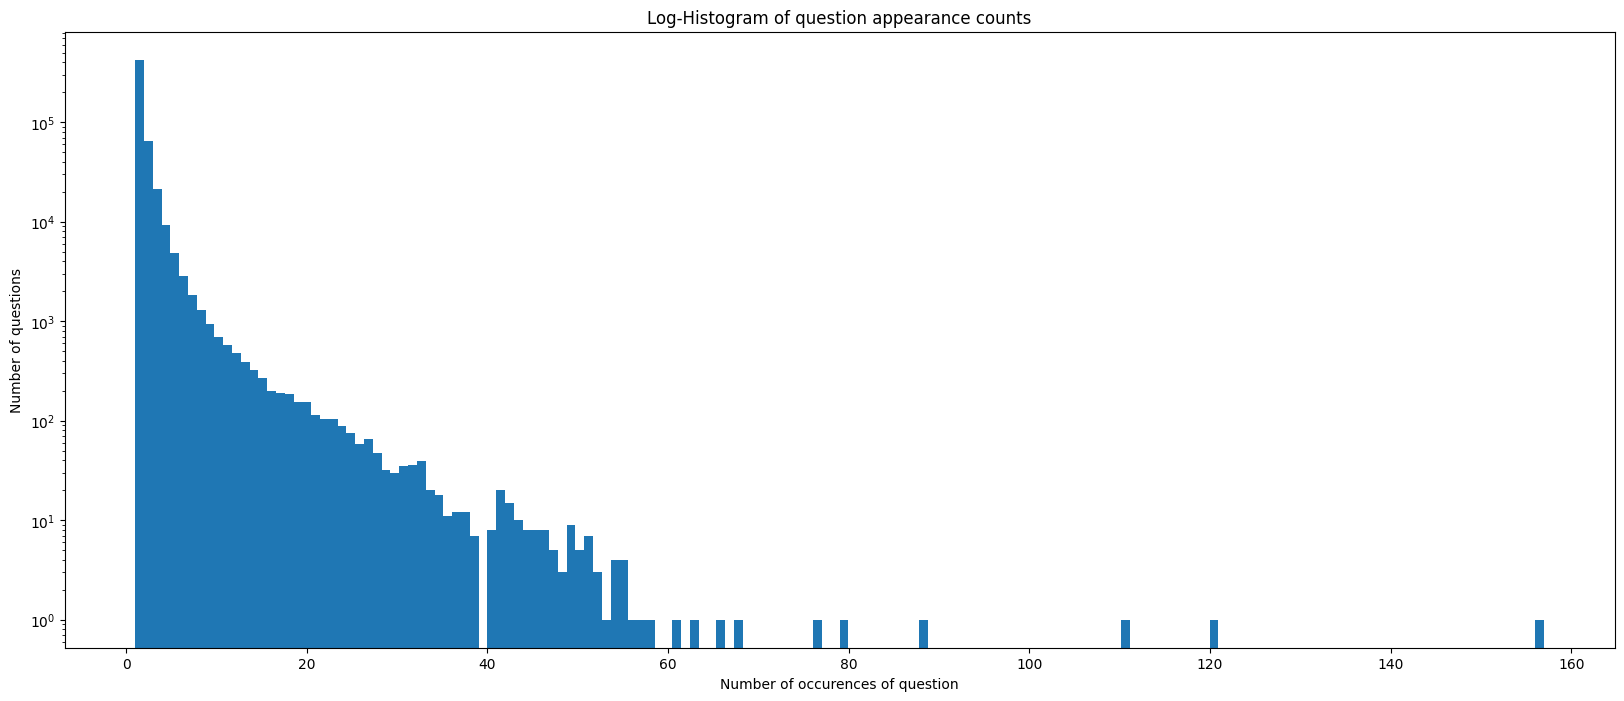

In [ ]:
plt.figure(figsize=(20, 8))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()

### 3. Basic Feature Engineering: 

Let us now construct a few features like:

- ____freq_qid1____ = Frequency of qid1's #ie, number of times question1 occur
- ____freq_qid2____ = Frequency of qid2's
- ____q1len____ = Length of q1
- ____q2len____ = Length of q2
- ____q1_n_words____ = Number of words in Question 1
- ____q2_n_words____ = Number of words in Question 2
- ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
- ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
- ____word_share____ = (word_common)/(word_Total)
- ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2
- ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2

In [ ]:
df['question1'] = df['question1'].astype(str)
df['question2'] = df['question2'].astype(str)

In [ ]:
data = df

def common_wrd(row):
    x = set(row['question1'].lower().strip().split(" ")) 
    y = set(row['question2'].lower().strip().split(" "))
    return 1.0 * len(x & y)


def total(row):
    set1 = set(row['question1'].lower().strip().split(" "))
    set2 = set(row['question2'].lower().strip().split(" "))
    return 1.0 * (len(set1) + len(set2))

def word_share(row):
    x = row['word_common']/row['word_total']
    return  x

############################################

data['freq_qid1'] = data['qid1'].apply(lambda x: cnt[x])
data['freq_qid2'] = data['qid2'].apply(lambda x: cnt[x])
data['q1len'] = data['question1'].apply(lambda x: len(x))
data['q2len'] = data['question2'].apply(lambda x: len(x))
data['q1_n_words'] = data['question1'].apply(lambda x: len(x.split(" ")))
data['q2_n_words'] = data['question2'].apply(lambda x: len(x.split(" ")))
data['word_common'] = data.apply(common_wrd,axis=1)
data['word_total'] = data.apply(total,axis=1)
data['word_share'] = data.apply(word_share,axis=1)
data['freq_q1+q2'] = data['freq_qid1']+data['freq_qid2']
data['freq_q1-q2'] = abs(data['freq_qid1']-data['freq_qid2'])
data.to_csv("/content/drive/MyDrive/Deep_Learning/NLP/Duplicate_question/basic_train.csv", index=False)

In [ ]:
data.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
310696,310696,434855,434856,Why Shimla was spelled as Simla in the movie t...,Is Tamasha movie going to flop?,0,1,1,53,31,10,6,1.0,16.0,0.062500,2,0
263946,263946,380596,380597,Does mucinex cause a false positive?,What causes false positives?,0,1,2,36,28,6,4,1.0,10.0,0.100000,3,1
295242,295242,405705,417259,Is Slack a native app?,Are the Slack mobile applications native or HT...,1,2,1,22,56,5,9,2.0,14.0,0.142857,3,1


### Analyzing word share

<ipython-input-16-bd0081dbd6ce>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['is_duplicate'] == 1]['word_share'],color='red',label='similar')
<ipython-input-16-bd0081dbd6ce>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['is_duplicate'] == 0]['word_share'],color='blue',

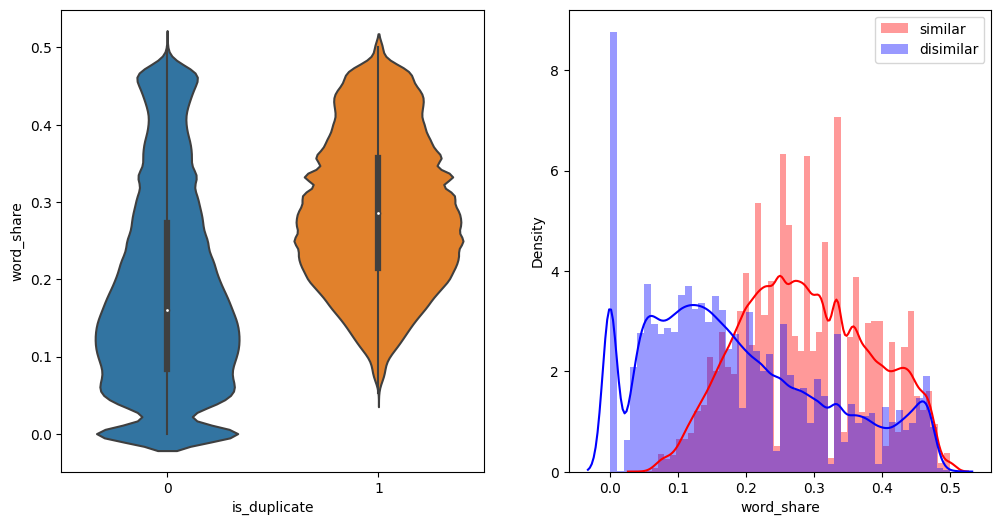

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_share',data=data)
plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1]['word_share'],color='red',label='similar')
sns.distplot(data[data['is_duplicate'] == 0]['word_share'],color='blue',label='disimilar')
plt.legend()
plt.show()

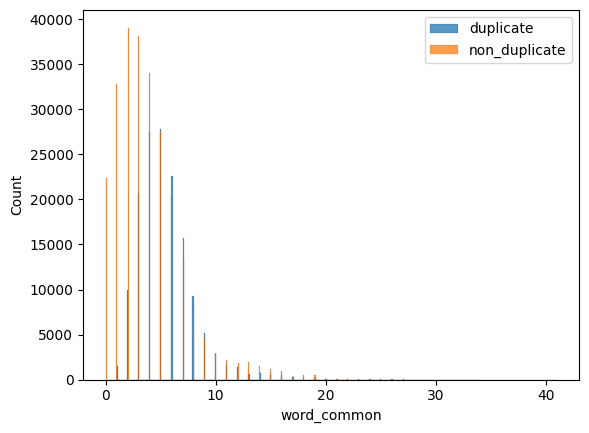

In [ ]:
sns.histplot(data[data['is_duplicate']==1]['word_common'],label='duplicate')
sns.histplot(data[data['is_duplicate']==0]['word_common'],label='non_duplicate')
plt.legend()
plt.show()

### 4. Testing on Baseline Algorithm 

### 4. Advanced Data preprocessing 

### Advanced Features

1. Token Features
- cwc_min: This is the ratio of the number of common words to the length of the smaller question
- cwc_max: This is the ratio of the number of common words to the length of the larger question
- csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
- ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
- last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
- first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

2. Length Based Features
- mean_len: Mean of the length of the two questions (number of words)
- abs_len_diff: Absolute difference between the length of the two questions (number of words)


3. Fuzzy Features
- fuzz_ratio: fuzz_ratio score from fuzzywuzzy
- fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
- token_sort_ratio: token_sort_ratio from fuzzywuzzy
- token_set_ratio: token_set_ratio from fuzzywuzzy

In [ ]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [ ]:
import nltk
nltk.download('stopwords')
new_df = data.copy()
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
new_df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
162079,162079,87530,41347,Which is a good solar panel installation provi...,Which is a good solar panel installation provi...,0,5,8,80,77,...,13,3,0.899991,0.899991,0.999950,0.999950,0.916659,0.916659,1,1
399354,399354,96149,532610,How do I access my Yahoo accounts without stil...,How do you unlock a frozen Yahoo account?,0,9,1,108,41,...,10,8,0.399992,0.153845,0.333322,0.166664,0.374995,0.157894,0,1
105590,105590,18108,29371,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1,24,24,102,103,...,48,0,0.749991,0.749991,0.999988,0.999988,0.736838,0.736838,0,1


In [ ]:
!pip install distance

In [ ]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    #length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [ ]:
[0.0]*3

[0.0, 0.0, 0.0]

In [ ]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
#new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
new_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,...,0.833319,0.714276,0.999980,0.999980,0.833326,0.714281,0,1,2,13.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,2,51,88,...,0.599988,0.299997,0.499975,0.333322,0.499994,0.307690,0,1,5,10.5
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,...,0.333328,0.249997,0.249994,0.166664,0.299997,0.214284,0,1,4,12.0


In [ ]:
!pip install fuzzywuzzy

In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
print(new_df.shape)
new_df.head()

(404287, 31)


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,...,0.833326,0.714281,0,1,2,13.0,93,98,93,100
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,2,51,88,...,0.499994,0.307690,0,1,5,10.5,66,73,63,86
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,...,0.299997,0.214284,0,1,4,12.0,43,41,63,63
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,...,0.000000,0.000000,0,0,2,10.0,9,20,24,28
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,...,0.285710,0.153845,0,1,6,10.0,35,54,47,67


In [ ]:
new_df.to_csv("/content/drive/MyDrive/Deep_Learning/NLP/Duplicate_question/advanced_train.csv",index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# create a sample dataframe with two columns "question-1" and "question-2"
df = pd.DataFrame({
    "question-1": ["What is your name?", "What is your favorite color?"],
    "question-2": ["My name is John.", "My favorite color is blue."]
})

# create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# fit and transform the "question-1" and "question-2" columns
tfidf_matrix = tfidf.fit_transform(df["question-1"] + " " + df["question-2"])

# get the feature names
#feature_names = tfidf.get_feature_names()

# create a dataframe from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# print the TF-IDF dataframe
tfidf_df

,0,1,2,3,4,5,6,7,8
0,0.00000,0.000000,0.000000,0.486841,0.342119,0.243420,0.684237,0.243420,0.243420
1,0.28235,0.564699,0.564699,0.401788,0.000000,0.200894,0.000000,0.200894,0.200894
